# Libraries

In [4]:
###### Step 1: Import Libraries
# Synthetic dataset
import seaborn as sns
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

# Graphs

``` Graph 1
Graph 1
```

<Axes: xlabel='feature1', ylabel='feature2'>

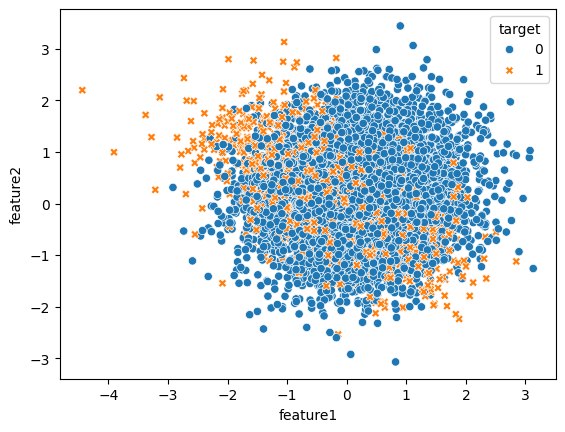

In [5]:
###### Step 2: Create Imbalanced Dataset
# Create an imbalanced dataset
X, y = make_classification(n_samples=8000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.8, 0.2],
                           class_sep=0.2)
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target", style="target")

``` Graph 2
Graph 2
```

<Axes: xlabel='feature1', ylabel='feature2'>

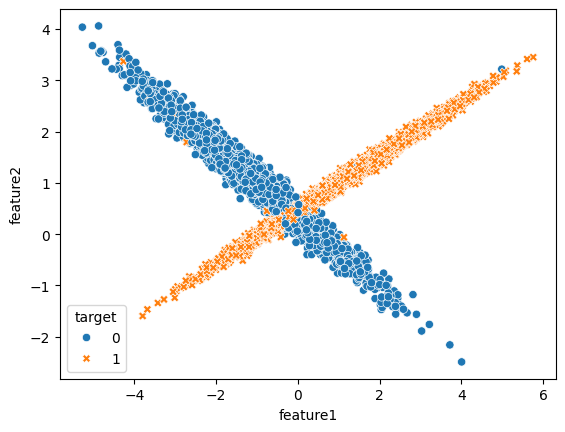

In [6]:
X, y = make_classification(n_samples=8000,
          n_features=2, n_redundant=0,
          n_informative=2,
          n_clusters_per_class=1)

df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target", style="target")

``` Graph 3
Graph 3
```

<Axes: xlabel='feature1', ylabel='feature2'>

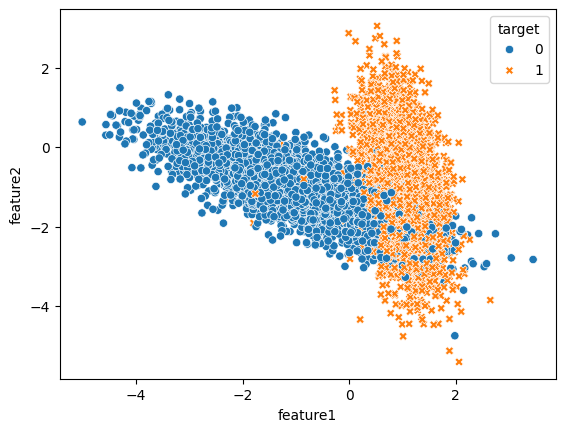

In [7]:
X, y = make_classification(n_samples=8000,
                            n_features=2,
                            n_redundant=0,
                            n_informative=2,
                            n_clusters_per_class=1)

df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target", style="target")

``` Graph 4
Graph 4
```

<Axes: xlabel='feature1', ylabel='feature2'>

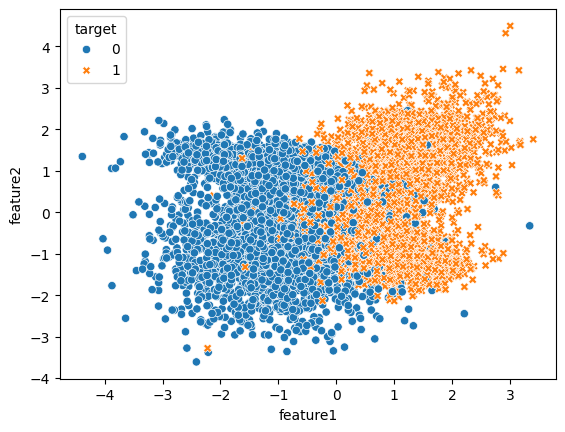

In [8]:
X, y = make_classification(n_samples=8000,
                            n_features=2,
                           n_redundant=0,
                           n_informative=2)
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target", style="target")

``` Graph 5
Graph 5
```

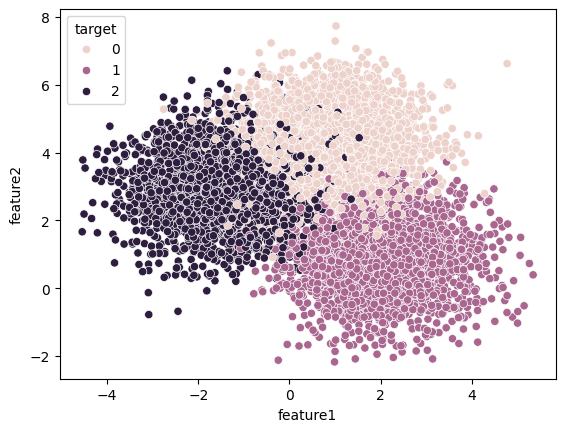

In [9]:
X, y = make_blobs(n_samples=8000, 
                centers=3, n_features=2,
                random_state=0)

df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target")
plt.show()

``` Graph 6
Graph 6
```

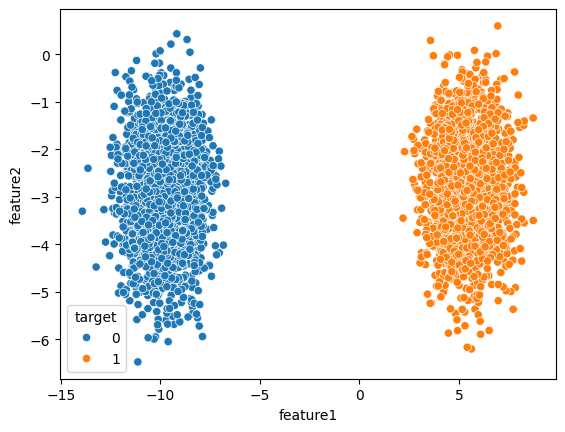

In [10]:
X, y = make_blobs(n_samples=5000, 
                centers=2, 
                n_features=2)

df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target")
plt.show()

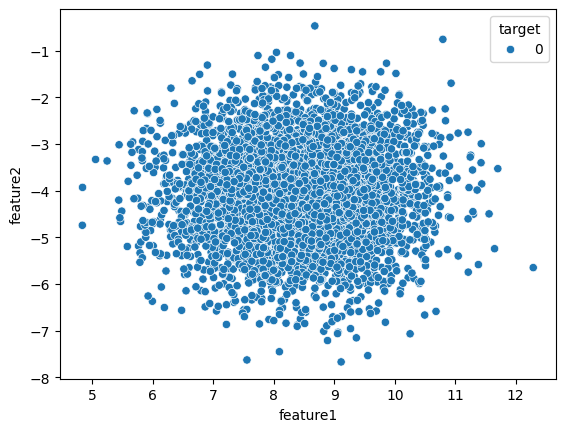

In [11]:
X, y = make_blobs(n_samples=5000, 
                centers=1, 
                n_features=2)

df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
sns.scatterplot(data=df, x="feature1", y="feature2", hue="target")
plt.show()

In [12]:
df

,feature1,feature2,target
0,7.260772,-3.176403,0
1,8.752505,-4.789789,0
2,8.377673,-3.406333,0
3,8.666967,-5.333521,0
4,9.223559,-4.069501,0
...,...,...,...
4995,7.573456,-2.846860,0
4996,10.113623,-2.175249,0
4997,7.517847,-5.692411,0
4998,7.863696,-3.384971,0


# OneClassSVM

In [13]:
scalerSVC=StandardScaler()
data_scaled_svc=scalerSVC.fit_transform(X)
one_class_svm = OneClassSVM(nu=0.1, kernel = 'rbf', gamma = 'auto').fit(data_scaled_svc)

In [14]:
df['label_svm'] = one_class_svm.predict(X)
df['score_svm'] = one_class_svm.score_samples(X)
df

,feature1,feature2,target,label_svm,score_svm
0,7.260772,-3.176403,0,-1,1.049693e-03
1,8.752505,-4.789789,0,-1,4.282974e-08
2,8.377673,-3.406333,0,-1,8.075020e-06
3,8.666967,-5.333521,0,-1,9.846303e-09
4,9.223559,-4.069501,0,-1,2.955450e-08
...,...,...,...,...,...
4995,7.573456,-2.846860,0,-1,5.433598e-04
4996,10.113623,-2.175249,0,-1,3.086612e-09
4997,7.517847,-5.692411,0,-1,3.312655e-07
4998,7.863696,-3.384971,0,-1,7.605159e-05


In [15]:
series_score_svm=np.array(df['score_svm'])
series_score_reshaped_svm=series_score_svm.reshape(-1,1)
scaler=MinMaxScaler()
data_scaled_svm=scaler.fit_transform(series_score_reshaped_svm)
df['score_svm'] = data_scaled_svm
df

,feature1,feature2,target,label_svm,score_svm
0,7.260772,-3.176403,0,-1,3.620377e-03
1,8.752505,-4.789789,0,-1,1.477192e-07
2,8.377673,-3.406333,0,-1,2.785063e-05
3,8.666967,-5.333521,0,-1,3.395976e-08
4,9.223559,-4.069501,0,-1,1.019330e-07
...,...,...,...,...,...
4995,7.573456,-2.846860,0,-1,1.874040e-03
4996,10.113623,-2.175249,0,-1,1.064568e-08
4997,7.517847,-5.692411,0,-1,1.142530e-06
4998,7.863696,-3.384971,0,-1,2.623008e-04


In [16]:
df['umbral_svm']=np.where(df['score_svm']<(np.percentile(df['score_svm'],5)),1,0)
df['label_svm']=np.where(df['label_svm']==-1,1,0)
df

,feature1,feature2,target,label_svm,score_svm,umbral_svm
0,7.260772,-3.176403,0,1,3.620377e-03,0
1,8.752505,-4.789789,0,1,1.477192e-07,0
2,8.377673,-3.406333,0,1,2.785063e-05,0
3,8.666967,-5.333521,0,1,3.395976e-08,0
4,9.223559,-4.069501,0,1,1.019330e-07,0
...,...,...,...,...,...,...
4995,7.573456,-2.846860,0,1,1.874040e-03,0
4996,10.113623,-2.175249,0,1,1.064568e-08,0
4997,7.517847,-5.692411,0,1,1.142530e-06,0
4998,7.863696,-3.384971,0,1,2.623008e-04,0


# LocalOutlierFactor

In [17]:
clf = LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',contamination=0.1)
df['label_LOF'] = clf.fit_predict(X)
df['score_LOF'] = clf.negative_outlier_factor_
df

,feature1,feature2,target,label_svm,score_svm,umbral_svm,label_LOF,score_LOF
0,7.260772,-3.176403,0,1,3.620377e-03,0,1,-0.986948
1,8.752505,-4.789789,0,1,1.477192e-07,0,1,-0.984516
2,8.377673,-3.406333,0,1,2.785063e-05,0,1,-1.006113
3,8.666967,-5.333521,0,1,3.395976e-08,0,1,-0.984312
4,9.223559,-4.069501,0,1,1.019330e-07,0,1,-0.988990
...,...,...,...,...,...,...,...,...
4995,7.573456,-2.846860,0,1,1.874040e-03,0,1,-1.018824
4996,10.113623,-2.175249,0,1,1.064568e-08,0,1,-1.073955
4997,7.517847,-5.692411,0,1,1.142530e-06,0,-1,-1.084829
4998,7.863696,-3.384971,0,1,2.623008e-04,0,1,-1.002160


In [18]:
series_score_lof=np.array(df['score_LOF'])
series_score_reshaped_LOF=series_score_lof.reshape(-1,1)
scaler_LFO_only_variable=MinMaxScaler()
data_scaled_LOF=scaler_LFO_only_variable.fit_transform(series_score_reshaped_LOF)
df['score_LOF'] = data_scaled_LOF
df

,feature1,feature2,target,label_svm,score_svm,umbral_svm,label_LOF,score_LOF
0,7.260772,-3.176403,0,1,3.620377e-03,0,1,0.982981
1,8.752505,-4.789789,0,1,1.477192e-07,0,1,0.984089
2,8.377673,-3.406333,0,1,2.785063e-05,0,1,0.974245
3,8.666967,-5.333521,0,1,3.395976e-08,0,1,0.984182
4,9.223559,-4.069501,0,1,1.019330e-07,0,1,0.982050
...,...,...,...,...,...,...,...,...
4995,7.573456,-2.846860,0,1,1.874040e-03,0,1,0.968451
4996,10.113623,-2.175249,0,1,1.064568e-08,0,1,0.943322
4997,7.517847,-5.692411,0,1,1.142530e-06,0,-1,0.938365
4998,7.863696,-3.384971,0,1,2.623008e-04,0,1,0.976047


In [19]:
df['umbral_LOF']=np.where(df['score_LOF']<(np.percentile(df['score_LOF'],5)),1,0)
df['label_LOF']=np.where(df['label_LOF']==-1,1,0)
df

,feature1,feature2,target,label_svm,score_svm,umbral_svm,label_LOF,score_LOF,umbral_LOF
0,7.260772,-3.176403,0,1,3.620377e-03,0,0,0.982981,0
1,8.752505,-4.789789,0,1,1.477192e-07,0,0,0.984089,0
2,8.377673,-3.406333,0,1,2.785063e-05,0,0,0.974245,0
3,8.666967,-5.333521,0,1,3.395976e-08,0,0,0.984182,0
4,9.223559,-4.069501,0,1,1.019330e-07,0,0,0.982050,0
...,...,...,...,...,...,...,...,...,...
4995,7.573456,-2.846860,0,1,1.874040e-03,0,0,0.968451,0
4996,10.113623,-2.175249,0,1,1.064568e-08,0,0,0.943322,0
4997,7.517847,-5.692411,0,1,1.142530e-06,0,1,0.938365,0
4998,7.863696,-3.384971,0,1,2.623008e-04,0,0,0.976047,0


# Isolation forest

In [20]:
# Train the Isolation Forest model on the sepal width data
isolation_forest = IsolationForest(n_estimators=500, contamination=0.1,max_features=2)
isolation_forest.fit(X)

,n_estimators,500
,max_samples,'auto'
,contamination,0.1
,max_features,2
,bootstrap,False
,n_jobs,None
,random_state,None
,verbose,0
,warm_start,False


In [21]:
df['Isolation_label'] = isolation_forest.predict(X)
df['Isolation_score'] = isolation_forest.score_samples(X)
series_score_isolation=np.array(df['Isolation_score'])
series_score_reshaped_isolation=series_score_isolation.reshape(-1,1)
scaler_isolation=MinMaxScaler()
data_scaled_isolation=scaler_isolation.fit_transform(series_score_reshaped_isolation)
df['Isolation_score'] = data_scaled_isolation
df['umbral_isolation']=np.where(df['Isolation_score']<(np.percentile(df['Isolation_score'],5)),1,0)
df['Isolation_label']=np.where(df['Isolation_label']==-1,1,0)
df

,feature1,feature2,target,label_svm,score_svm,umbral_svm,label_LOF,score_LOF,umbral_LOF,Isolation_label,Isolation_score,umbral_isolation
0,7.260772,-3.176403,0,1,3.620377e-03,0,0,0.982981,0,0,0.807337,0
1,8.752505,-4.789789,0,1,1.477192e-07,0,0,0.984089,0,0,0.943755,0
2,8.377673,-3.406333,0,1,2.785063e-05,0,0,0.974245,0,0,0.929701,0
3,8.666967,-5.333521,0,1,3.395976e-08,0,0,0.984182,0,0,0.864401,0
4,9.223559,-4.069501,0,1,1.019330e-07,0,0,0.982050,0,0,0.935153,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7.573456,-2.846860,0,1,1.874040e-03,0,0,0.968451,0,0,0.775279,0
4996,10.113623,-2.175249,0,1,1.064568e-08,0,0,0.943322,0,1,0.345219,1
4997,7.517847,-5.692411,0,1,1.142530e-06,0,1,0.938365,0,0,0.675228,0
4998,7.863696,-3.384971,0,1,2.623008e-04,0,0,0.976047,0,0,0.917153,0


``` Graph result OneClassSVM
Graph result OneClassSVM
```

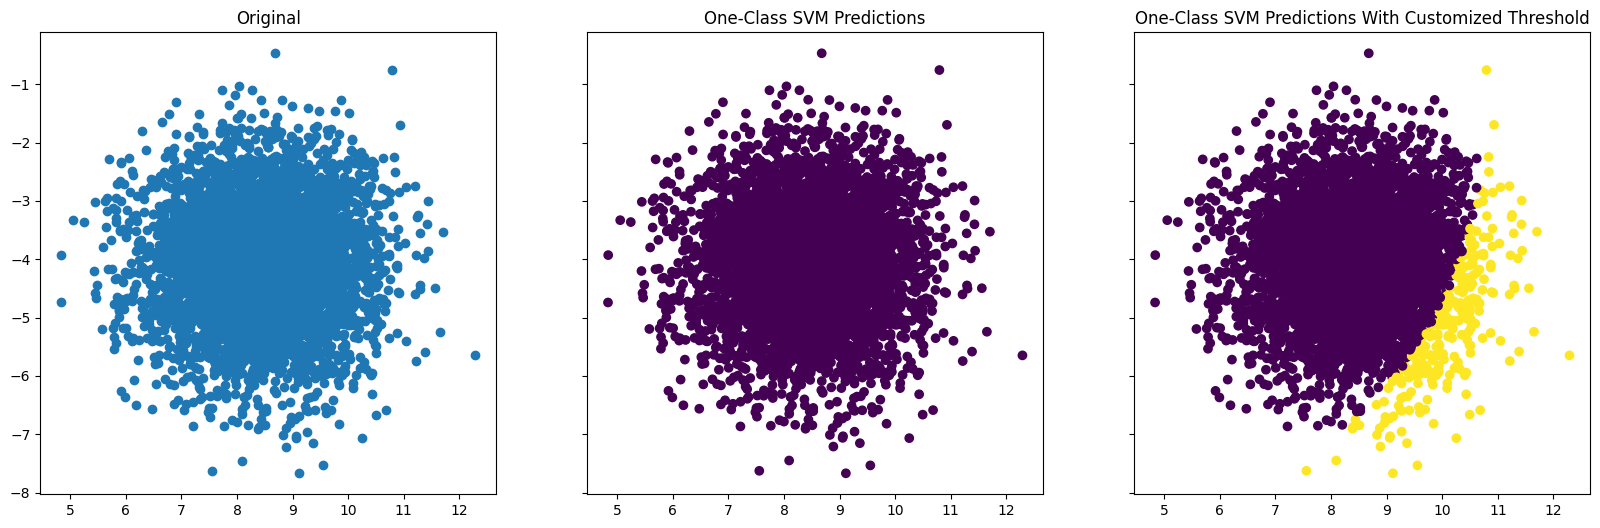

In [22]:

# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(20,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df['feature1'], df['feature2'])
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df['feature1'], df['feature2'], c=df['label_svm'])
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df['feature1'], df['feature2'], c=df['umbral_svm'])
plt.show()

``` Graph result LOF
Graph result LOF
```


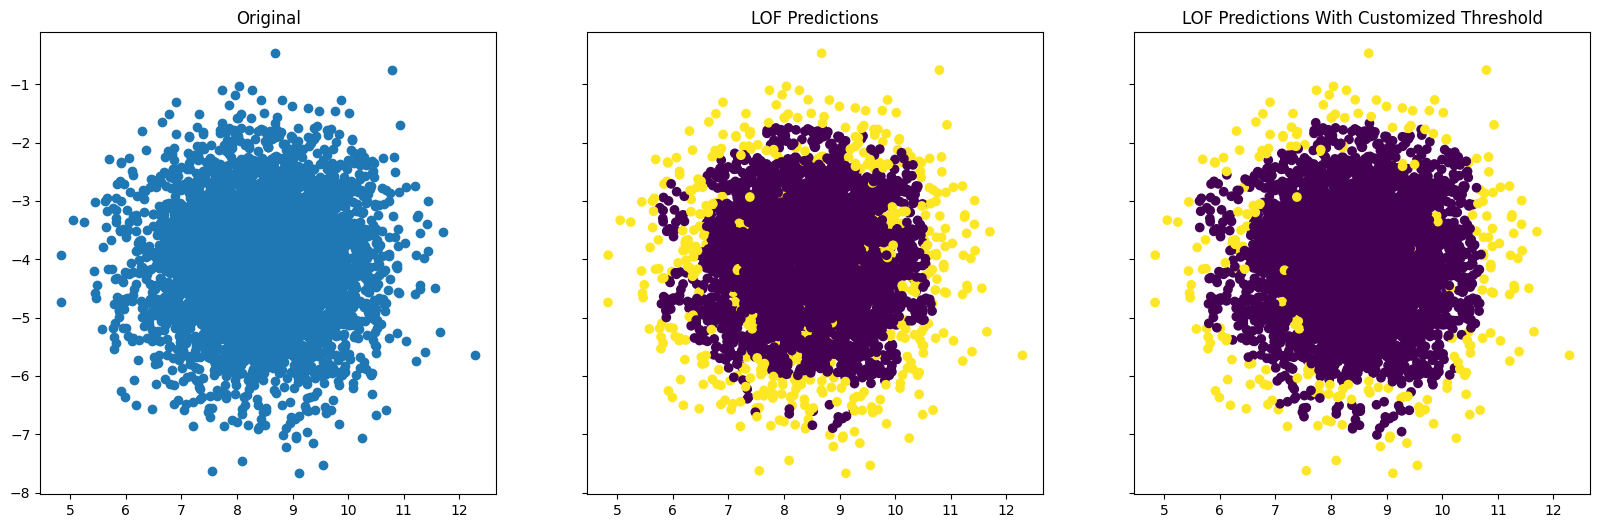

In [23]:
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(20,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df['feature1'], df['feature2'])
# One-Class SVM Predictions
ax1.set_title('LOF Predictions')
ax1.scatter(df['feature1'], df['feature2'], c=df['label_LOF'])
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('LOF Predictions With Customized Threshold')
ax2.scatter(df['feature1'], df['feature2'], c=df['umbral_LOF'])
plt.show()

``` Graph result Isolation
Graph result Isolation
```

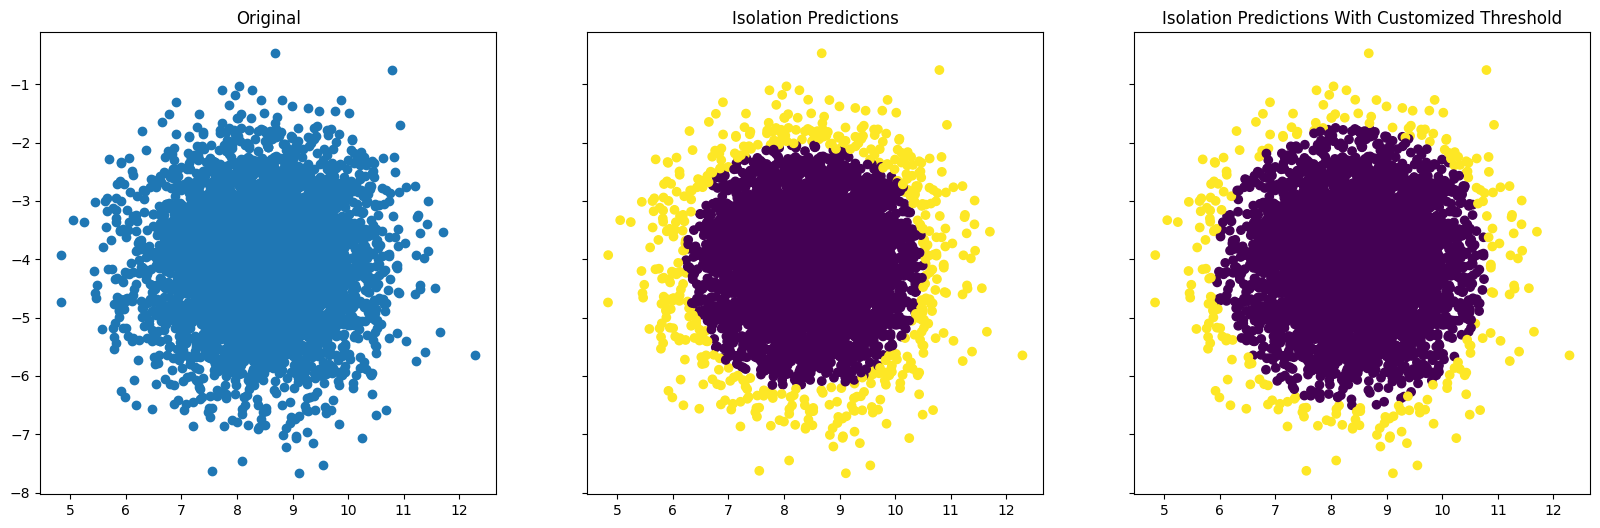

In [24]:
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(20,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df['feature1'], df['feature2'])
# One-Class SVM Predictions
ax1.set_title('Isolation Predictions')
ax1.scatter(df['feature1'], df['feature2'], c=df['Isolation_label'])
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('Isolation Predictions With Customized Threshold')
ax2.scatter(df['feature1'], df['feature2'], c=df['umbral_isolation'])
plt.show()